In [45]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Data Cleanup

In [64]:
img = cv2.imread('./test_images/000006.jpg')
img

array([[[ 77,  84,  87],
        [ 78,  85,  88],
        [ 79,  86,  89],
        ...,
        [ 35,  61,  73],
        [ 35,  61,  73],
        [ 35,  61,  73]],

       [[ 78,  85,  88],
        [ 78,  85,  88],
        [ 79,  86,  89],
        ...,
        [ 35,  61,  73],
        [ 35,  61,  73],
        [ 35,  61,  73]],

       [[ 79,  86,  89],
        [ 80,  87,  90],
        [ 80,  87,  90],
        ...,
        [ 35,  61,  73],
        [ 35,  61,  73],
        [ 35,  61,  73]],

       ...,

       [[ 27,  41,  94],
        [ 30,  44,  97],
        [ 33,  46,  98],
        ...,
        [ 51, 100, 132],
        [ 51, 100, 132],
        [ 51, 100, 132]],

       [[ 29,  43,  96],
        [ 30,  44,  97],
        [ 33,  46,  98],
        ...,
        [ 51, 100, 132],
        [ 51, 100, 132],
        [ 51, 100, 132]],

       [[ 30,  44,  97],
        [ 31,  45,  98],
        [ 32,  45,  97],
        ...,
        [ 50,  99, 131],
        [ 50,  99, 131],
        [ 50,  99, 131]]

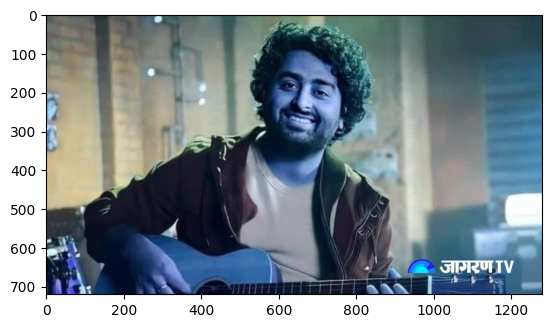

In [65]:
plt.imshow(img)

In [66]:
img.shape

(720, 1280, 3)

In [67]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray.shape

(720, 1280)

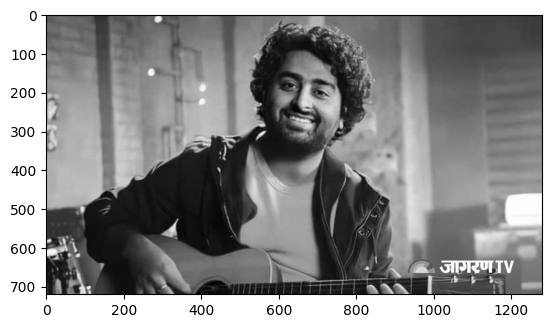

In [68]:
plt.imshow(gray, cmap='gray')

### Haar cascade is a machine learning object detection algorithm developed by Paul Viola and Michael Jones, primarily used for identifying objects in images and videos

In [69]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[554,  96, 228, 228]], dtype=int32)

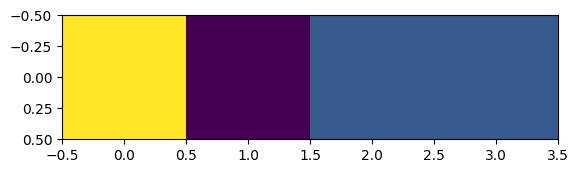

In [70]:
plt.imshow(faces)

In [71]:
(x,y,w,h) = faces[0]

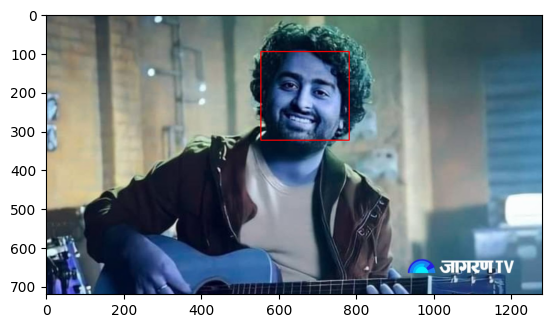

In [72]:
# cv2.rectangle(img, pt1, pt2, color, thickness)
face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_image)

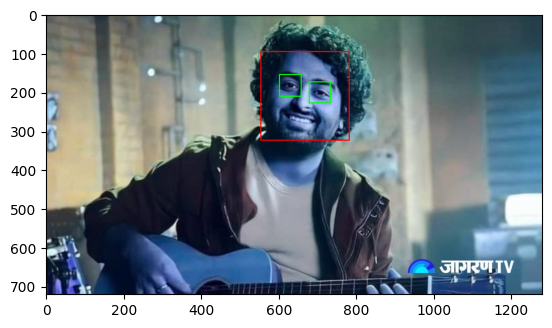

In [73]:
# Detects face and eyes inside the face region using another Haar Cascade
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    # ROI stands for Region of Interest.
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

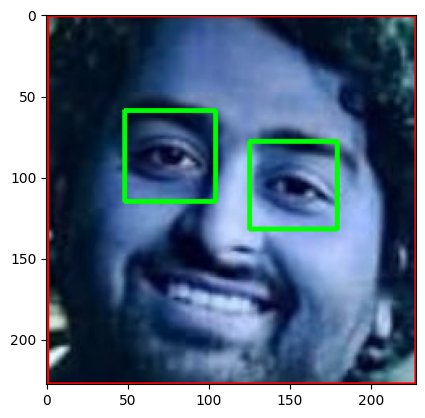

In [74]:
#ROI stands for Region of Interest.
plt.imshow(roi_color)

In [75]:
def get_cropped_image_with_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # necessary for Haar Cascades
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
        # ROI stands for Region of Interest.
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

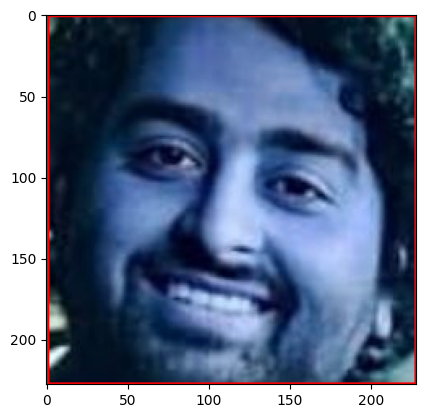

In [76]:
roi = get_cropped_image_with_2_eyes('./test_images/000006.jpg')
plt.imshow(roi)

In [77]:
# roi = get_cropped_image_with_2_eyes('./test_images/000012.jpg')
# if roi:
#     plt.imshow(roi)

In [78]:
print(roi)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 73 103  98]
  ...
  [ 74 128 128]
  [ 64 118 118]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [  9  25  37]
  ...
  [146 180 186]
  [149 181 187]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [  8  24  36]
  ...
  [145 177 183]
  [148 177 184]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [79]:
# now store cropped images into saperate folder
img_dir_path = './dataset'
img_dir_cr_path = './dataset/cropped/'

In [80]:
# read all folder
import os
import shutil
# shutil is a standard Python library for:
# File operations: copying, moving, deleting files/folders

# remove cropped and add again
if os.path.exists(img_dir_cr_path):
    shutil.rmtree(img_dir_cr_path)


img_dirs = []
for entry in os.scandir(img_dir_path):
    if entry.is_dir():
        img_dirs.append(entry.path)

os.mkdir(img_dir_cr_path)

In [81]:
img_dirs

['./dataset/Alia_Bhatt',
 './dataset/Shah_Rukh_Khan',
 './dataset/Arijit_Singh',
 './dataset/M._S._Dhoni',
 './dataset/Deepika_Padukone',
 './dataset/Virat_Kohli',
 './dataset/Amitabh_Bachchan',
 './dataset/Priyanka_Chopra']

In [82]:
valid_extensions = ['.jpg', '.jpeg', '.png']
cropped_image_dirs = []
celeb_file_names_dict = {}

for img_dir in img_dirs:
    celeb_name = img_dir.split('/')[-1]
    cropped_folder_name = img_dir_cr_path + celeb_name
    celeb_file_names_dict[celeb_name] = []
    #scan img_dir and process each img
    c = 1
    for entry in os.scandir(img_dir):
        if entry.is_file() and os.path.splitext(entry.name)[1].lower() in valid_extensions:
            roi_color = get_cropped_image_with_2_eyes(entry.path)
            if roi_color is not None:
                # if not os.path.exists(cropped_folder_name):
                #     os.mkdir(cropped_folder_name)
                os.makedirs(cropped_folder_name, exist_ok=True)
                cropped_image_dirs.append(cropped_folder_name)
                print("generating media for - ", cropped_folder_name)
                cropped_file_name = celeb_name + str(c) + ".jpg"
                cropped_file_path = cropped_folder_name + '/' + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celeb_file_names_dict[celeb_name].append(cropped_file_path)
                c += 1

generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia_Bhatt
generating media for -  ./dataset/cropped/Alia

# Feature Engineering

In [83]:
# apply wavelet transform to extract meaning features that can help with image identification. 
# USing wavelet transform and a raw pixel image we will create our X and use class labels as y. 
# These X and y will be used for model training.

In [84]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [85]:
print(roi)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 73 103  98]
  ...
  [ 74 128 128]
  [ 64 118 118]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [  9  25  37]
  ...
  [146 180 186]
  [149 181 187]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [  8  24  36]
  ...
  [145 177 183]
  [148 177 184]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


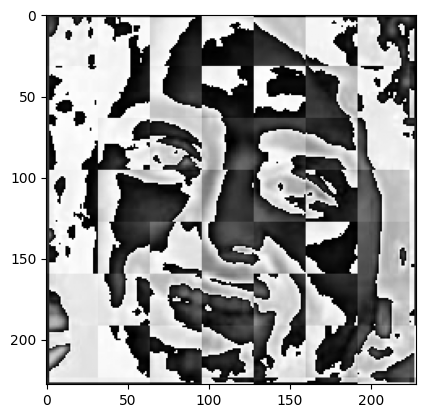

In [86]:
im_har = w2d(roi,'db1',5)
plt.imshow(im_har, cmap='gray')

In [87]:
# You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. 
# This along with raw pixel image can be used as an input for our classifier

In [88]:
celeb_file_names_dict

{'Alia_Bhatt': ['./dataset/cropped/Alia_Bhatt/Alia_Bhatt1.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt2.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt3.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt4.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt5.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt6.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt7.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt8.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt9.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt10.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt11.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt12.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt13.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt14.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt15.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt16.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt17.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt18.jpg',
  './dataset/cropped/Alia_Bhatt/Alia_Bhatt19.jpg',
  './dataset/cropped/Alia_

In [89]:
# assiginnig some number to celebrity for Y
class_dict = {}
count = 0
for celebrity_name in celeb_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Alia_Bhatt': 0,
 'Shah_Rukh_Khan': 1,
 'Arijit_Singh': 2,
 'M._S._Dhoni': 3,
 'Deepika_Padukone': 4,
 'Virat_Kohli': 5,
 'Amitabh_Bachchan': 6,
 'Priyanka_Chopra': 7}

In [90]:
# below we are alligning vertically both cropped and cropped wavelet transform images

In [91]:
X, y = [], []
for celebrity_name, training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])     

In [92]:
X[0]

array([[231],
       [  1],
       [  0],
       ...,
       [225],
       [222],
       [ 81]], shape=(4096, 1), dtype=uint8)

In [118]:
# y

In [94]:
len(X[0])

4096

In [95]:
32*32*3 + 32*32

4096

In [96]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(580, 4096)

# Data cleaning process is done. 
# Now we are ready to train our model

In [97]:
# We will use SVM with rbf kernel tuned with heuristic finetuning

In [98]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6896551724137931

In [100]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.65      0.81      0.72        16
           2       1.00      0.11      0.20         9
           3       0.67      0.40      0.50        10
           4       0.60      0.90      0.72        30
           5       0.75      1.00      0.86        15
           6       0.71      0.75      0.73        16
           7       0.83      0.66      0.73        29

    accuracy                           0.69       145
   macro avg       0.74      0.63      0.63       145
weighted avg       0.72      0.69      0.67       145



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [101]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [102]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [103]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/utils/extmat

,model,best_score,best_params
0,svm,0.691954,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.519540,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.691954,{'logisticregression__C': 1}


In [104]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [105]:
best_estimators['svm'].score(X_test,y_test)

0.7310344827586207

In [106]:
best_estimators['random_forest'].score(X_test,y_test)

0.46206896551724136

In [107]:
best_estimators['logistic_regression'].score(X_test,y_test)

/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Cellar/jupyterlab/4.4.3_3/libexec/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.7517241379310344

In [108]:
best_clf = best_estimators['svm']

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  1,  0,  1,  2,  1,  0,  1],
       [ 1, 14,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  2,  0,  3,  0,  0,  1],
       [ 1,  3,  0,  5,  0,  0,  1,  0],
       [ 2,  0,  0,  1, 25,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 1,  1,  1,  0,  0,  0, 13,  0],
       [ 1,  2,  0,  1,  5,  0,  2, 18]])

Text(95.72222222222221, 0.5, 'Truth')

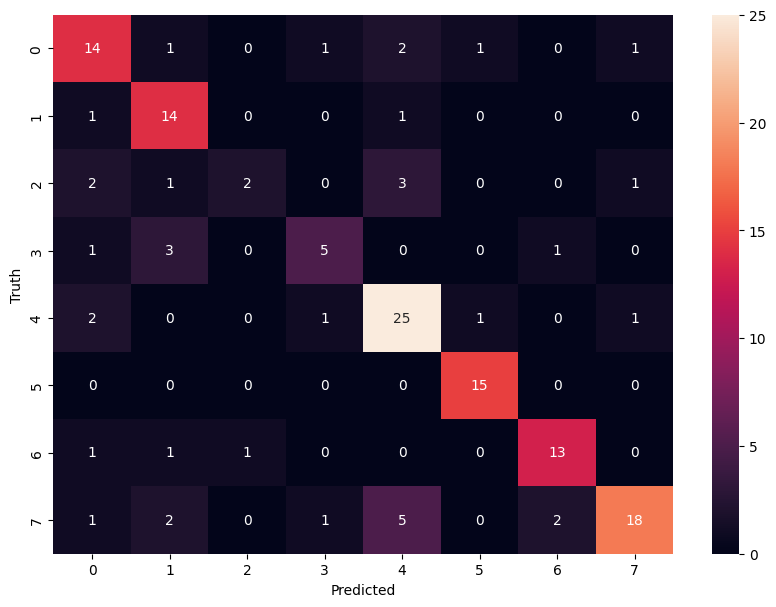

In [110]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Save the trained model

In [111]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [115]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary

In [116]:
class_dict

{'Alia_Bhatt': 0,
 'Shah_Rukh_Khan': 1,
 'Arijit_Singh': 2,
 'M._S._Dhoni': 3,
 'Deepika_Padukone': 4,
 'Virat_Kohli': 5,
 'Amitabh_Bachchan': 6,
 'Priyanka_Chopra': 7}

In [117]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))